## Курсова робота з дисципліни методи оптимізації на тему(Метод  Вейсмана)

В роботі використовується метод Хука-Дживса для безумовної оптимізації та метод Вейсмана для умовної оптимізації

## Зміст

* Анотація
* Вступ
* Теоретичні відомості
* Практична частина
* Висновки
* Автори
* Посилання

## Анотація

В цій роботі досліджується збіжність метода Хука-Дживса при мінімізації функції Розенброка в залежності від:
1. Значення початкового кроку $\|\Delta x\|$
2. Параметрів методу
3. Вигляду критеріїв закінчення $
  \begin{cases}
    \frac{\|x^{k+1} - x^{k}\|}{\|x^{k}\|} \leq \varepsilon  \\
    | f^{k+1} - f^{k} | \leq \varepsilon 
  \end{cases}
  або \ \|\Delta x\| \leq \varepsilon 
 $
4. Модифікацій методу

Використовується метод Вейсмана для умовної оптимізації в залежності від:
1. Розташування локального мінімума (всередині / поза допустимою областю).
2. Виду допустимої області (випукла / невипукла).



## Вступ

Я намагаюся визначити який критерій закінчення дає більшу точність методу, Та підбрати такі параметри методу та значення початкового кроку що підвищать його швидкість та точність. Написати програму, що виконує умовну оптимізацію методом Вейсмана.

## Теоретичні відомості

Метод Хука-Дживса складається з двох частин. Досліджуючий пошук орієнтований на виявлення характеру локальної поведінки цільової функції та визначення нарямку
уздовж « ярів ».
Пошук по зразку використовує інформацію , одержану після проведення досліджуючого пошуку для руху по «ярам».
Пошук по зразку $ x^{(k+1)}_p = x^{(k)} + (x^{(k)} - x^{(k-1)})$, при наближенні до точки мінімуму, якщо алгоритм проходить повз точку мімімуму, зменшує значення кроку $\|\Delta x_{нове}\| = \frac{\|\Delta x_{попереднє}\|}{2}$ \\
Критерії закінчення $
  \begin{cases}
    \frac{\|x^{k+1} - x^{k}\|}{\|x^{k}\|} \leq \varepsilon  \\
    | f^{k+1} - f^{k} | \leq \varepsilon 
  \end{cases}
  або \ \|\Delta x\| \leq \varepsilon 
 $ \\
Метод Вейсмана метод умовної оптимізації, що використовує для оптимізації штрафної функції. \\
Штрафна функція $P(x, r) = f(x) + \sum_{i=1}^p(1-U_i)**g_i^2$, де $U_i = 1$, якщо обмеження виконується і 0, якщо не виконується, $r_i$ - значення штрафного параметру, $g_i$ - обмеження. \\
Функція Розенброка $ f = 100*(x_1^2-x_2)^2+(x_1-1)^2 $ Мінімум цієї функції знаходиться в точці (1, 1)

## Практична частина

Імпортування бібліотек:
* Бібліотека math для реалізації деяких математичних функцій(https://docs.python.org/3/library/math.html)
* Бібліотека sympy для символьних обчислень(https://docs.sympy.org/latest/index.html)
* Бібліотека matplotlib для побудови графіків(https://matplotlib.org/)
* Бібліотека numpy для генераціяї масивів при побудові графіків(https://numpy.org/doc/stable/reference/routines.html)
* Білбіотека rаndom для генерації випадкових точок(https://docs.python.org/3/library/random.html)

In [ ]:
import math
import sympy
from matplotlib import pyplot as plt
import numpy
import random

Визначення змінних

In [ ]:
x_1 = sympy.symbols('x_1')
x_2 = sympy.symbols('x_2')
f = 100*(x_1**2-x_2)**2+(x_1-1)**2

Тепер x_1 та x_2 це змінні, а f -  функція що залежить від цих змінних.

Визначення функцій 

In [ ]:
def function_calculation(function, x1, x2):
  result = function.subs([(x_1, x1), (x_2, x2)])
  return result

Ця функція приймає функцію залежну від x_1 та x_2, та два числа x1 та x2. І обчислює значення функції в точці з координатами(x1, x2)

In [ ]:
def rosenbrok_function(x1, x2):
  result = 100*(x1**2-x2)**2+(x1-1)**2
  return result

Ця функція обчислює значення функції(function), в точці(x0), використовуючи для критерію закінчення значення epsilon з початковим кроком first_step.

In [ ]:
def hooke_jeeves(first_step, epsilon, k1, k2, x0, function):
  x_list = [x0]
  f_list = [function_calculation(function, x0[0], x0[1])]
  t = True
  check = 0
  step = first_step
  xp = x0
  while t:
    middle_x_list = []
    middle_f_list = []
    middle_x_list.append([xp[0], xp[1]+step[1]])
    middle_x_list.append([xp[0], xp[1]-step[1]])
    middle_x_list.append([xp[0]+step[0], xp[1]])
    middle_x_list.append([xp[0]-step[0], xp[1]])
    middle_x_list.append([xp[0]+step[0], xp[1]+step[1]])
    middle_x_list.append([xp[0]-step[0], xp[1]+step[1]])
    middle_x_list.append([xp[0]+step[0], xp[1]-step[1]])
    middle_x_list.append([xp[0]-step[0], xp[1]-step[1]])
    for el in middle_x_list:
      middle_f_list.append(function_calculation(function, el[0], el[1]))
    if min(middle_f_list) < f_list[-1]:
      check = 0
      f_list.append(min(middle_f_list))
      x_list.append(middle_x_list[middle_f_list.index(min(middle_f_list))])
      xp = [k1*a - b for a, b in zip(x_list[-1], x_list[-2])]
    else:
      if check == 0 and len(x_list) > 1:
        x_list = x_list[0:-1]
        f_list = f_list[0:-1]
        check = 1
        xp = x_list[-1]
      step = [a/k2 for a in step]
    
    if step[0] <= epsilon and step[1] <= epsilon:
      t = False
  return x_list
    

Ця функція, це реалізація методу Хука-Дживса з критерієм закінчення $ \|\Delta x\| \leq \varepsilon  $. Функція приймає значення довжини першого кроку, $ \varepsilon $, $k_1$, $k_2$. Де $k_1$ це параметр, що використовується для обчислення $x_p$, $ x_p = k_1*x^{(2)} - x^{(1)}$, $k_2$ - параметр що використовується для зменшення довжини кроку. $ \|\Delta x_2\| = \frac{\|\Delta x_1\|}{k_2} $. Функція повертає список базисних точок.

Приклад роботи цієї функції при початковому кроці (0.2, 0.2) з початковою точкою $x_0 = (-1.2, 0)$ і $ \varepsilon = 0.001 $

In [ ]:
print("Точка мінімуму - ", hooke_jeeves([0.2,0.2], 0.001, 2, 1.5, [-1.2, 0], f)[-1])

Точка мінімуму -  [0.9989071223334276, 0.9980234870851106]


Графічне представлення роботи функції

<a list of 11 text.Text objects>

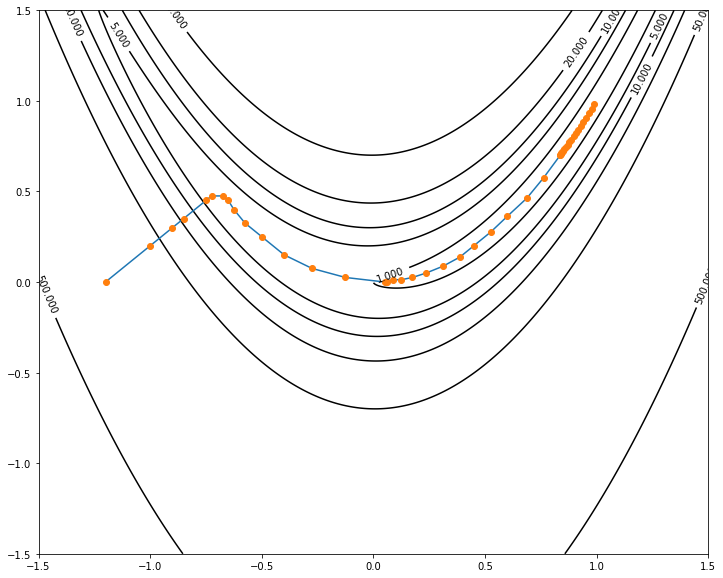

In [ ]:
x1_list = numpy.linspace(-1.5, 1.5, 2000)
x2_list = numpy.linspace(-1.5, 1.5, 2000)
y1_list = []
y2_list = []
y_list = hooke_jeeves([0.2,0.2], 0.001, 2, 2, [-1.2, 0], f)
for el in y_list:
  y1_list.append(el[0])
  y2_list.append(el[1])
X1_list, X2_list = numpy.meshgrid(x1_list, x2_list)
Z = rosenbrok_function(X1_list, X2_list)
fig, ax = plt.subplots(1,1,figsize=(12,10))
CS = ax.contour(X1_list, X2_list, Z, levels=[0,1,5,10,20,50,500], colors = 'black')
ax.plot(y1_list, y2_list)
ax.plot(y1_list, y2_list, 'o')
ax.clabel(CS, inline=True)

Залежність кількості обчислень від значення початкового кроку

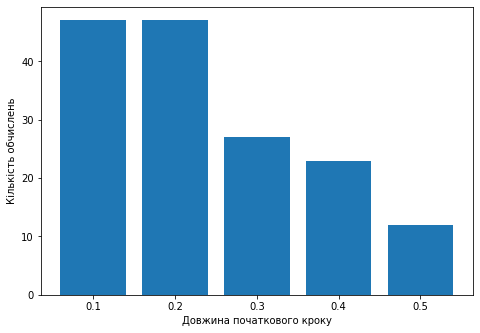

In [ ]:
steps_list = [[0.1, 0.1],[0.2, 0.2],[0.3, 0.3], [0.4, 0.4], [0.5,0.5]]
N_list = []
labels = ['0.1', '0.2', '0.3', '0.4', '0.5']
for el in steps_list:
  N_list.append(len(hooke_jeeves(el, 0.001, 2, 2, [-1.2, 0], f)))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, N_list)
plt.xlabel("Довжина початкового кроку")
plt.ylabel("Кількість обчислень")
plt.show()


Залежність точності обчислень від значення початкового кроку

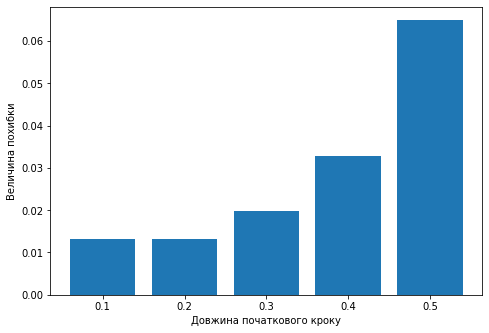

In [ ]:
steps_list = [[0.1, 0.1],[0.2, 0.2],[0.3, 0.3], [0.4, 0.4], [0.5,0.5]]
P_list = []
labels = ['0.1', '0.2', '0.3', '0.4', '0.5']
for el in steps_list:
  P_list.append(((1 - hooke_jeeves(el, 0.001, 2, 2, [-1.2, 0], f)[-1][0]) + (1 - hooke_jeeves(el, 0.001, 2, 2, [-1.2, 0], f)[-1][1]))/2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, P_list)
plt.xlabel("Довжина початкового кроку")
plt.ylabel("Величина похибки")
plt.show()

Залежність кількості обчислень від параметру $ k_1 $, де $ x_p = k_1*x^{(2)} - x^{(1)}$

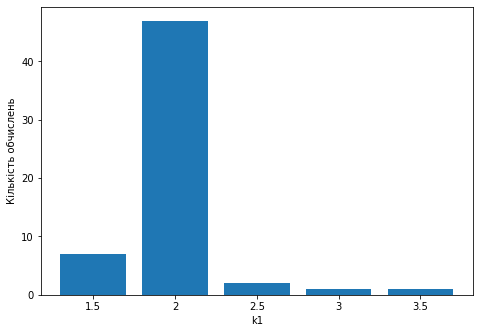

In [ ]:
k1_list = [1.5, 2, 2.5, 3, 3.5]
N_list = []
labels = ['1.5', '2', '2.5', '3', '3.5']
for el in k1_list:
  N_list.append(len(hooke_jeeves([0.2,0.2], 0.001, el, 2, [-1.2, 0], f)))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, N_list)
plt.xlabel("k1")
plt.ylabel("Кількість обчислень")
plt.show()

Залежність точності обчислень від параметру $ k_1 $

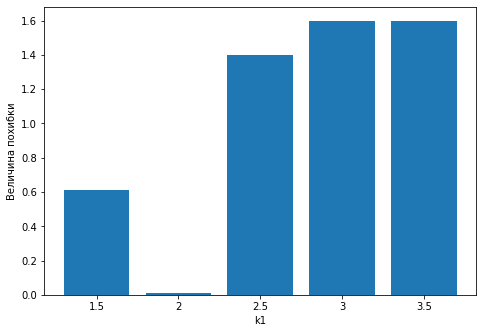

In [ ]:
k1_list = [1.5, 2, 2.5, 3, 3.5]
P_list = []
labels = ['1.5', '2', '2.5', '3', '3.5']
for el in k1_list:
  P_list.append(((1 - hooke_jeeves([0.2, 0.2], 0.001, el, 2, [-1.2, 0], f)[-1][0]) + (1 - hooke_jeeves([0.2, 0.2], 0.001, el, 2, [-1.2, 0], f)[-1][1]))/2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, P_list)
plt.xlabel("k1")
plt.ylabel("Величина похибки")
plt.show()

Залежність кількості обчислень від параметру $ k_2 $, де $ \|\Delta x_2\| = \frac{\|\Delta x_1\|}{k_2} $

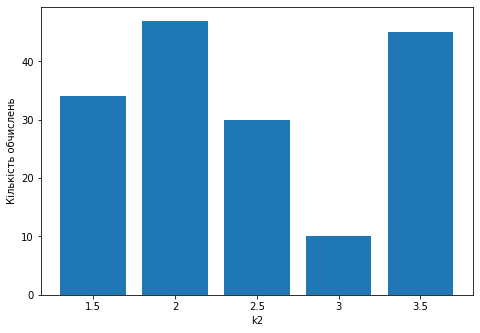

In [ ]:
k2_list = [1.5, 2, 2.5, 3, 3.5]
N_list = []
labels = ['1.5', '2', '2.5', '3', '3.5']
for el in k2_list:
  N_list.append(len(hooke_jeeves([0.2,0.2], 0.001, 2, el, [-1.2, 0], f)))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, N_list)
plt.xlabel("k2")
plt.ylabel("Кількість обчислень")
plt.show()

Залежність точності обчислень від параметру $ k_2 $

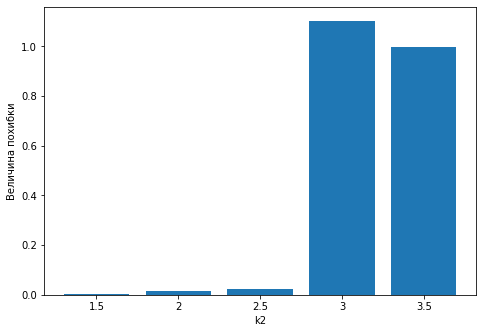

In [ ]:
k2_list = [1.5, 2, 2.5, 3, 3.5]
P_list = []
labels = ['1.5', '2', '2.5', '3', '3.5']
for el in k2_list:
  P_list.append(((1 - hooke_jeeves([0.2, 0.2], 0.001, 2, el, [-1.2, 0], f)[-1][0]) + (1 - hooke_jeeves([0.2, 0.2], 0.001, 2, el, [-1.2, 0], f)[-1][1]))/2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, P_list)
plt.xlabel("k2")
plt.ylabel("Величина похибки")
plt.show()

In [ ]:
def hooke_jeeves_v2(first_step, epsilon, k1, k2, x0, function):
  x_list = [x0]
  f_list = [function_calculation(function, x0[0], x0[1])]
  t = True
  check = 0
  step = first_step
  xp = x0
  while t:
    middle_x_list = []
    middle_f_list = []
    middle_x_list.append([xp[0], xp[1]+step[1]])
    middle_x_list.append([xp[0], xp[1]-step[1]])
    middle_x_list.append([xp[0]+step[0], xp[1]])
    middle_x_list.append([xp[0]-step[0], xp[1]])
    middle_x_list.append([xp[0]+step[0], xp[1]+step[1]])
    middle_x_list.append([xp[0]-step[0], xp[1]+step[1]])
    middle_x_list.append([xp[0]+step[0], xp[1]-step[1]])
    middle_x_list.append([xp[0]-step[0], xp[1]-step[1]])
    for el in middle_x_list:
      middle_f_list.append(function_calculation(function, el[0], el[1]))
    if min(middle_f_list) < f_list[-1]:
      check = 0
      f_list.append(min(middle_f_list))
      x_list.append(middle_x_list[middle_f_list.index(min(middle_f_list))])
      xp = [k1*a - b for a, b in zip(x_list[-1], x_list[-2])]
    else:
      if check == 0:
        x_list = x_list[0:-1]
        f_list = f_list[0:-1]
        check = 1
        xp = x_list[-1]
      step = [a/k2 for a in step]
    
    if (math.sqrt(pow(x_list[-1][0] - x_list[-2][0], 2) + pow(x_list[-1][1] - x_list[-2][1], 2))/math.sqrt(pow(x_list[-2][0],2) + pow(x_list[-2][1],2))) <= epsilon and abs(f_list[-1] - f_list[-2]) <= epsilon:
      t = False
  return x_list

Ця функція, це реалізація методу Хука-Дживса з критерієм закінчення $
  \begin{cases}
    \frac{\|x^{k+1} - x^{k}\|}{\|x^{k}\|} \leq \varepsilon  \\
    | f^{k+1} - f^{k} | \leq \varepsilon 
  \end{cases} $ \\
Функція приймає значення довжини першого кроку, $ \varepsilon $, $k_1$, $k_2$. Де $k_1$ це параметр, що використовується для обчислення $x_p$, $ x_p = k_1*x^{(2)} - x^{(1)}$, $k_2$ - параметр що використовується для зменшення довжини кроку. $ \|\Delta x_2\| = \frac{\|\Delta x_1\|}{k_2} $. Функція повертає список базисних точок.

Залежність кількості обчислень від критерію закінчення

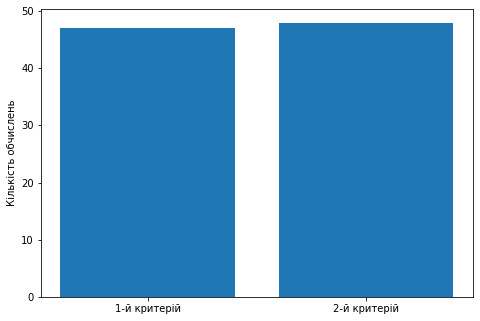

In [ ]:
N_list = []
N_list.append(len(hooke_jeeves([0.2, 0.2], 0.001, 2, 2, [-1.2, 0], f)))
N_list.append(len(hooke_jeeves_v2([0.2, 0.2], 0.001, 2, 2, [-1.2, 0], f)))
labels = ['1-й критерій', '2-й критерій']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, N_list)
plt.ylabel("Кількість обчислень")
plt.show()

Залежність точності обчислень від критерію закінчення

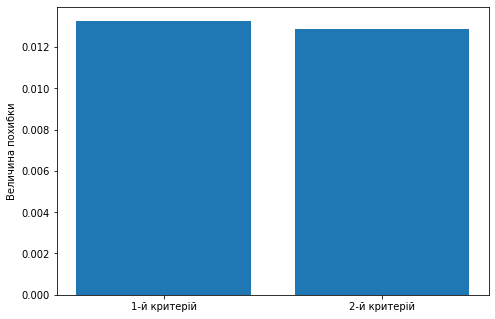

In [ ]:
P_list = []
labels = ['1-й критерій', '2-й критерій']
P_list.append(((1 - hooke_jeeves([0.2, 0.2], 0.001, 2, 2, [-1.2, 0], f)[-1][0]) + (1 - hooke_jeeves([0.2, 0.2], 0.001, 2, 2, [-1.2, 0], f)[-1][1]))/2)
P_list.append(((1 - hooke_jeeves_v2([0.2, 0.2], 0.001, 2, 2, [-1.2, 0], f)[-1][0]) + (1 - hooke_jeeves_v2([0.2, 0.2], 0.001, 2, 2, [-1.2, 0], f)[-1][1]))/2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, P_list)
plt.ylabel("Величина похибки")
plt.show()

Реалізація методу Вейсмана. Реалізація методу Вейсмана складається з двох частин перша, це функція weisman(), ця функція формує штрафеу функцію та викоритсовує метод Хука-Дживса, для пошуку мінімуму, друга цикл який перевіряє умови закінчення роботи метоу, та якщо вони не виконується підвищує штрафний параметр в 10 разів.

In [ ]:
def weisman(function, limits_list, start, r):
  R_func = 0
  for el in limits_list:
    if el.subs([(x_1, start[0]), (x_2, start[1])]) <= 0:
      u = 0 
    else:
      u = 1
    R_func = R_func + r*u*el*el
  P_func = function + R_func
  answer = hooke_jeeves([0.2,0.2], 0.001, 2, 2, start, P_func)
  return answer

In [ ]:
t = True
limits_list = [x_1**2 + x_2**2 - 9]
r = 1
x0 = [-1.5, 1]
xn = x0
while t:
  x = weisman(f, limits_list, xn, r)[-1]
  if abs(x0[0] - x[0]) <= 0.001 and abs(x0[1] - x[1]) <= 0.001:
    t = False
    rand_x_list = []
    i = 0
    while i < 10:
      rand_x_list.append([x[0] + random.uniform(-1, 1), x[1] + random.uniform(-1,1)])
      i = i + 1
    rand_f_list = [function_calculation(f, el[0], el[1]) for el in rand_x_list]
    if min(rand_f_list) < function_calculation(f, x[0], x[1]):  
      x = rand_x_list[rand_f_list.index(min(rand_f_list))]
      t = True
  else:
    r = r * 10
    x0 = x
print("Точка мінімуму - ", x0)

Точка мінімуму -  [0.9812500000000016, 0.9625]


Графічне представлення роботи методу для випуклої області, при обмеженні $ x_1^2 + x_2^2 - 4 \leq 0$

<a list of 10 text.Text objects>

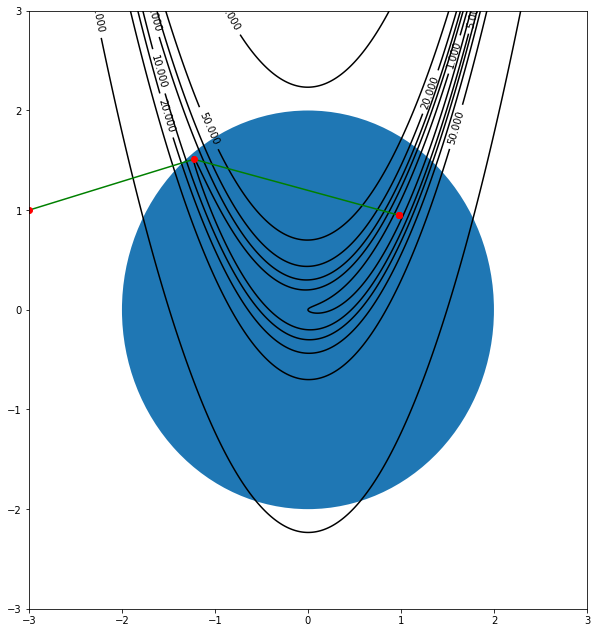

In [ ]:
t = True
limits_list = [x_1**2 + x_2**2 - 4]
r = 1

x0 = [-3, 1]
xn = x0
weisman_x_list = [x0]
while t:
  x = weisman(f, limits_list, xn, r)[-1]
  weisman_x_list.append(x)
  xn = x
  if abs(x0[0] - x[0]) <= 0.001 and abs(x0[1] - x[1]) <= 0.001:
    t = False
    rand_x_list = []
    i = 0
    while i < 10:
      rand_x_list.append([x[0] + random.uniform(-1, 1), x[1] + random.uniform(-1,1)])
      i = i + 1
    rand_f_list = [function_calculation(f, el[0], el[1]) for el in rand_x_list]
    if min(rand_f_list) < function_calculation(f, x[0], x[1]):  
      x = rand_x_list[rand_f_list.index(min(rand_f_list))]
      t = True
  else:
    r = r * 10
    x0 = x

weisman_x_list.append(x)
x1_list = numpy.linspace(-3, 3, 6000)
x2_list = numpy.linspace(-3, 3, 6000)
y1_list = []
y2_list = []
for el in weisman_x_list:
  y1_list.append(el[0])
  y2_list.append(el[1])
X1_list, X2_list = numpy.meshgrid(x1_list, x2_list)
Z = rosenbrok_function(X1_list, X2_list)
fig, ax = plt.subplots(1,1,figsize=(10,11))
CS = ax.contour(X1_list, X2_list, Z, levels=[0,1,5,10,20,50,500], colors = 'black')
draw_circle = plt.Circle((0, 0), 2,fill=True)
ax.plot(y1_list, y2_list, color = 'green')
ax.plot(y1_list, y2_list, 'o', color = 'red')
ax.add_artist(draw_circle)
ax.clabel(CS, inline=True)

Графічне представлення роботи методу для не випуклої області, при обмеженнях $ x_1^2 - x_2^2 - 2 \leq 0 $ i $ -0.3*x_1^2 + x_2 -1 \leq 0 $

Точка мінімуму -  [0.9781249999999968, 0.9562500000000055]


<a list of 10 text.Text objects>

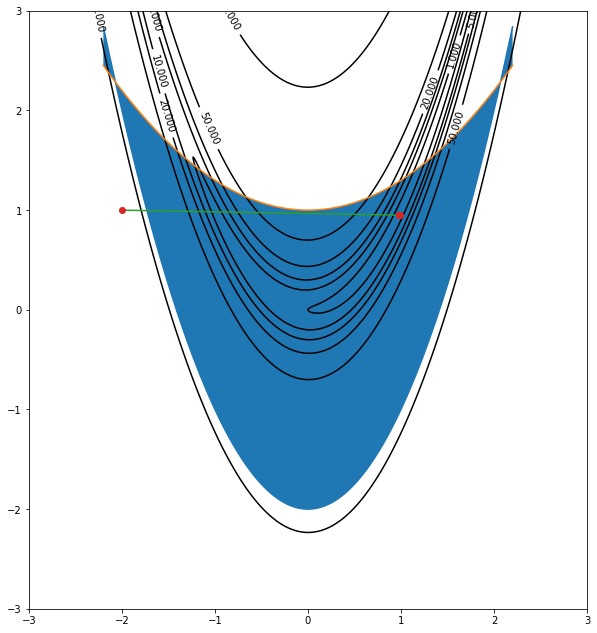

In [ ]:
t = True
limits_list = [x_1**2 - x_2 - 2, -0.3*x_1**2+x_2-1]
r = 1
x0 = [-2, 1]
xn = x0
weisman_x_list = [x0]
while t:
  x = weisman(f, limits_list, xn, r)[-1]
  xn = x
  weisman_x_list.append(x)
  if abs(x0[0] - x[0]) <= 0.001 and abs(x0[1] - x[1]) <= 0.001:
    t = False
    rand_x_list = []
    i = 0
    while i < 10:
      rand_x_list.append([x[0] + random.uniform(-1, 1), x[1] + random.uniform(-1,1)])
      i = i + 1
    rand_f_list = [function_calculation(f, el[0], el[1]) for el in rand_x_list]
    if min(rand_f_list) < function_calculation(f, x[0], x[1]):  
      x = rand_x_list[rand_f_list.index(min(rand_f_list))]
      t = True
  else:
    r = r * 10
    x0 = x
print("Точка мінімуму - ", x0)
weisman_x_list.append(x)
x1_list = numpy.linspace(-3, 3, 6000)
x2_list = numpy.linspace(-3, 3, 6000)
y1_list = []
y2_list = []
for el in weisman_x_list:
  y1_list.append(el[0])
  y2_list.append(el[1])
first_graf = []
second_graf = []
i = 0
x1_1_list = numpy.linspace(-2.2, 2.2, 4000)
while i < 4000:
  first_graf.append(pow(x1_1_list[i], 2) - 2)
  second_graf.append(0.3*pow(x1_1_list[i], 2) + 1)
  i = i + 1
X1_list, X2_list = numpy.meshgrid(x1_list, x2_list)
Z = rosenbrok_function(X1_list, X2_list)
fig, ax = plt.subplots(1,1,figsize=(10,11))
CS = ax.contour(X1_list, X2_list, Z, levels=[0,1,5,10,20,50,500], colors = 'black')
ax.plot(x1_1_list, first_graf)
ax.plot(x1_1_list, second_graf)
ax.fill_between(x1_1_list, first_graf, second_graf)
ax.plot(y1_list, y2_list)
ax.plot(y1_list, y2_list, 'o')

ax.clabel(CS, inline=True)

Використання методу Вейсмана для умовної оптимізації в залежності від розсташування точки локального мінімуму(в допустимій області), при обмеженні $ x_1^2 + x_2^2 - 4 \leq 0$

Точка мінімуму -  [0.9749999999999953, 0.9500000000000065]


<a list of 10 text.Text objects>

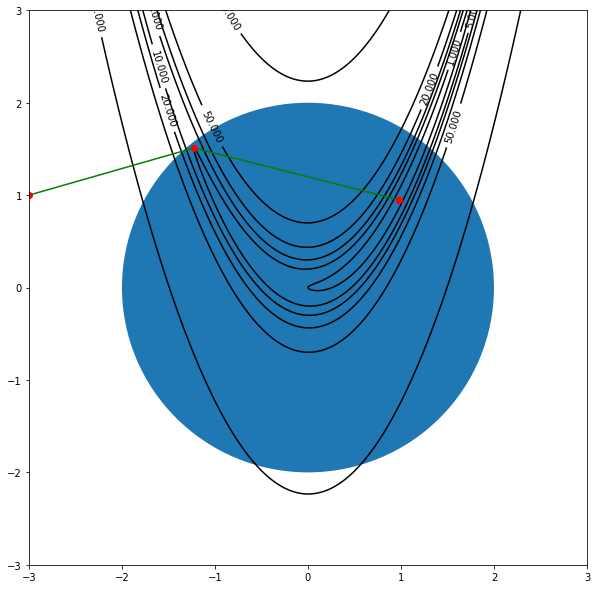

In [ ]:
t = True
limits_list = [x_1**2 + x_2**2 - 4]
r = 1

x0 = [-3, 1]
xn = x0
weisman_x_list = [x0]
while t:
  x = weisman(f, limits_list, xn, r)[-1]
  weisman_x_list.append(x)
  xn = x
  if abs(x0[0] - x[0]) <= 0.001 and abs(x0[1] - x[1]) <= 0.001:
    t = False
    rand_x_list = []
    i = 0
    while i < 10:
      rand_x_list.append([x[0] + random.uniform(-1, 1), x[1] + random.uniform(-1,1)])
      i = i + 1
    rand_f_list = [function_calculation(f, el[0], el[1]) for el in rand_x_list]
    if min(rand_f_list) < function_calculation(f, x[0], x[1]):  
      x = rand_x_list[rand_f_list.index(min(rand_f_list))]
      t = True
  else:
    r = r * 10
    x0 = x

print("Точка мінімуму - ", x0)
x1_list = numpy.linspace(-3, 3, 6000)
x2_list = numpy.linspace(-3, 3, 6000)
y1_list = []
y2_list = []
for el in weisman_x_list:
  y1_list.append(el[0])
  y2_list.append(el[1])
X1_list, X2_list = numpy.meshgrid(x1_list, x2_list)
Z = rosenbrok_function(X1_list, X2_list)
fig, ax = plt.subplots(1,1,figsize=(10,10.2))
CS = ax.contour(X1_list, X2_list, Z, levels=[0,1,5,10,20,50,500], colors = 'black')
draw_circle = plt.Circle((0, 0), 2,fill=True)
ax.add_artist(draw_circle)
ax.plot(y1_list, y2_list, color = 'green')
ax.plot(y1_list, y2_list, 'o', color = 'red')
ax.clabel(CS, inline=True)

Використання методу Вейсмана для умовної оптимізації в залежності від розсташування точки локального мінімуму(поза допустимою областю), при обмеженні $ (x_1+2)^2 + x_2^2 - 4 \leq 0$

Точка мінімуму -  [0.0015625000000009538, 9.43689570931383e-16]


<a list of 10 text.Text objects>

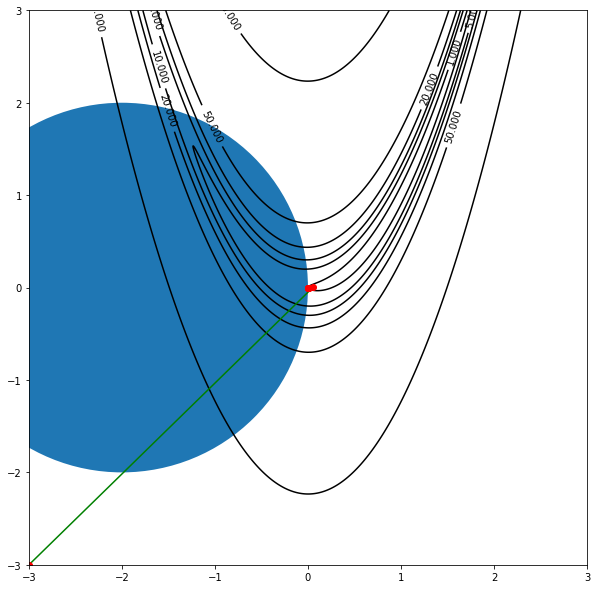

In [ ]:
t = True
limits_list = [(x_1+2)**2 + x_2**2 - 4]
r = 1

x0 = [-3, -3]
xn = x0
weisman_x_list = [x0]
while t:
  x = weisman(f, limits_list, xn, r)[-1]
  weisman_x_list.append(x)
  xn = x
  if abs(x0[0] - x[0]) <= 0.001 and abs(x0[1] - x[1]) <= 0.001:
    t = False
    rand_x_list = []
    i = 0
    while i < 10:
      rand_x_list.append([x[0] + random.uniform(-1, 1), x[1] + random.uniform(-1,1)])
      i = i + 1
    rand_f_list = [function_calculation(f, el[0], el[1]) for el in rand_x_list]
    if min(rand_f_list) < function_calculation(f, x[0], x[1]):  
      x = rand_x_list[rand_f_list.index(min(rand_f_list))]
      t = True
  else:
    r = r * 10
    x0 = x
print("Точка мінімуму - ", x0)
weisman_x_list.append(x)
x1_list = numpy.linspace(-3, 3, 6000)
x2_list = numpy.linspace(-3, 3, 6000)
y1_list = []
y2_list = []
for el in weisman_x_list:
  y1_list.append(el[0])
  y2_list.append(el[1])
X1_list, X2_list = numpy.meshgrid(x1_list, x2_list)
Z = rosenbrok_function(X1_list, X2_list)
fig, ax = plt.subplots(1,1,figsize=(10,10.2))
CS = ax.contour(X1_list, X2_list, Z, levels=[0,1,5,10,20,50,500], colors = 'black')
draw_circle = plt.Circle((-2, 0), 2,fill=True)
ax.add_artist(draw_circle)
ax.plot(y1_list, y2_list, color = 'green')
ax.plot(y1_list, y2_list, 'o', color = 'red')
ax.clabel(CS, inline=True)

## Висновки

В цій роботі я дослідив збіжність та точність метода Хука-Дживса при мінімізації функції Розенброка в залежності від різних параметрів. В результаті, я визначив, що Метод Хука-Дживса з критерієм закінчення $ \|\Delta x\| \leq \varepsilon  $ має більшу точність. Оптимальна величина першого кроку $ \|\Delta x\| $ має дорівнювати (0.1,0.1) або (0.2,0.2). Параметр $ k_1 $, $ x_p = k_1*x^{(2)} - x^{(1)}$ має дорівнювати 2 в інших випадках точність значно погіршується. Найбільш оптимальні значення для параметру $ k_2 $, де $ \|\Delta x_2\| = \frac{\|\Delta x_1\|}{k_2} $, це 1.5, 2, 2.5.

## Автори

Мишура Д.О. КМ-83 (myshurad2018@ukr.net)

## Посилання

* Документація бібліотеки math для реалізації деяких математичних функцій(https://docs.python.org/3/library/math.html)
* Документація бібліотеки sympy для символьних обчислень(https://docs.sympy.org/latest/index.html)
* Документація бібліотеки matplotlib для побудови графіків(https://matplotlib.org/)
* Документація бібліотеки numpy для генераціяї масивів при побудові графіків(https://numpy.org/doc/stable/reference/routines.html)
* Документація бібліотеки rаndom для генерації випадкових точок(https://docs.python.org/3/library/random.html)
* Побудова контурного графіку (https://pyprog.pro/mpl/mpl_contour.html)
* Хіммельблау "Прикладне нелінійне програмування" стр 343.(http://publ.lib.ru/ARCHIVES/H/HIMMEL'BLAU_Devid_M/_Himmel'blau_D.M..html)